<a href="https://colab.research.google.com/github/Srushtirodge/Capstone_Project_ML-Yes_Bank_Stock_Closing_Price_Prediction-/blob/main/Capstone_Project_ML(Yes_Bank_Stock_Closing_Price_Prediction).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Yes_Bank_Stock_Closing_Price_Prediction(Capstone_Project_Supervised_ML_Regression)**

##### **Project Type**    - Regression
##### **Contribution**    - Srushti Rodge

# **`Project Summary -`**


Yes_Bank_Stock_Closing_Price_Prediction(Capstone_Project_Supervised_ML_Regression)
Project Type - Regression
Contribution - Team
Team Member 1 - Vibuti Gupta
Team Member 2 - Rudraashish Sengupta
Project Summary -
Yes_Bank_Logo-01.png

This project aims to address the challenge of predicting the closing price of Yes Bank's stock, which is a crucial task for stakeholders, investors, and market participants. Yes Bank, as a prominent private sector bank in India, has encountered significant hurdles in recent years, including a substantial number of bad loans and involvement in fraud cases. These challenges have led to regulatory intervention by the Reserve Bank of India, making the prediction of Yes Bank's stock prices complex and uncertain.

To tackle this challenge, the project utilizes a comprehensive dataset comprising monthly stock price data since the bank's inception. The dataset includes various important metrics such as the closing, starting, highest, and lowest prices for each month. The objective is to develop predictive models that can effectively capture the intricate dynamics and trends in Yes Bank's stock prices, taking into account the turbulent events and uncertainties associated with the bank's performance.

The project involves applying various modeling techniques, including time series models regression methods. The goal is to evaluate the performance of these models in accurately forecasting the closing price of Yes Bank's stock. Additionally, the models will be assessed on their ability to incorporate the impact of significant events, such as fraud cases involving the bank's founders or regulatory interventions by the Reserve Bank of India.

By successfully predicting the closing price of Yes Bank's stock, this project can provide valuable insights and assist stakeholders in making informed decisions related to their investments in the bank. It aims to navigate the complexities and uncertainties surrounding Yes Bank's stock prices, ultimately contributing to the understanding of its financial performance and aiding in effective decision-making.

# **`GitHub Link -`**

# **`Problem Statement`**

The main objective of this project is to develop a robust and accurate predictive model that can effectively forecast the closing price of Yes Bank's stock. The challenge lies in understanding and capturing the complex dynamics and trends in the stock prices, considering various factors such as the historical trend of an increasing price followed by a sudden decline after 2018.

One of the key challenges in developing the predictive model is addressing the issue of multicollinearity present in the dataset. Multicollinearity occurs when there is a high correlation between independent variables, which can lead to difficulties in interpreting the model and can affect the accuracy of the predictions. Therefore, the model should incorporate techniques to handle multicollinearity and ensure that the independent variables are appropriately considered in the prediction process.

Furthermore, the model should account for significant events that have had an impact on Yes Bank's stock performance. This includes events such as fraud cases involving the bank's founders and regulatory interventions by the Reserve Bank of India. These events can significantly influence the stock prices, and it is crucial for the predictive model to capture and reflect their effects accurately.

In terms of performance, the model should aim for a high level of accuracy in forecasting the closing price of Yes Bank's stock. The 99% accuracy achieved by the K-Nearest Neighbors (KNN) Regression model serves as a benchmark, indicating the target accuracy that the developed model should strive to achieve. By achieving high accuracy, the predictive model can provide valuable insights to stakeholders, investors, and market participants, enabling them to make informed decisions and effectively manage their investments in Yes Bank's stock.

Overall, this project seeks to develop a predictive model that addresses the complexities and challenges associated with forecasting Yes Bank's stock prices. The ultimate goal is to provide stakeholders with a reliable tool that can enhance their understanding of the stock's future performance and support them in making well-informed investment decisions.

## ***`1. Know Your Data`***


### `Import Libraries`

In [1]:
# Import necessary libraries

# Import NumPy for numerical computations
import numpy as np

# Import Pandas for data manipulation and analysis
import pandas as pd

# Import Matplotlib for basic data visualization
import matplotlib.pyplot as plt

# Import Seaborn for advanced statistical visualizations
import seaborn as sns

# Import Plotly graph objects for interactive visualizations
import plotly.graph_objects as go

# Import the datetime module for working with dates and times
from datetime import datetime

# Import warnings module to ignore potential warnings
import warnings

### `Dataset Loading`

In [2]:
# Load Dataset
# This code imports the `drive` library from Google Colab.
# The 'drive' library allows us to mount our Google Drive to our Colab notebook.
# The 'mount()' function mounts our Google Drive to the '/content/drive' directory.
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
# Load the stock price data from the CSV file
# This code reads the CSV file 'data_YesBank_StockPrices.csv' from the '/content/drive/MyDrive/capstone project-Supervised ML-Regression/Data File' directory.
# The 'pd.read_csv()' function reads the CSV file and returns a Pandas DataFrame.
stock_df = pd.read_csv('/content/drive/MyDrive/project module 6/data_YesBank_StockPrices.csv')

### `Dataset First View`

In [4]:
# Display the first few rows of the DataFrame with a cool color gradient
# This code uses the 'head()' method to display the first few rows of the DataFrame.
# The 'style.background_gradient()' method applies a color gradient to the background of the DataFrame.
# The 'cmap='cool'' argument specifies the colormap to use.
stock_df.head().style.background_gradient(cmap='cool')

,Date,Open,High,Low,Close
0,Jul-05,13.000000,14.000000,11.250000,12.460000
1,Aug-05,12.580000,14.880000,12.550000,13.420000
2,Sep-05,13.480000,14.870000,12.270000,13.300000
3,Oct-05,13.200000,14.470000,12.400000,12.990000
4,Nov-05,13.350000,13.880000,12.880000,13.410000


### `Dataset Rows & Columns count`

In [5]:
print("The shape of the DataFrame is:", stock_df.shape)

The shape of the DataFrame is: (185, 5)


### `Dataset Information`

In [6]:
print("The information about the DataFrame is:", stock_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB
The information about the DataFrame is: None


From the above analysis, we can conclude that:




*   The shape of our dataset is 185 rows and 5 columns. This means that the dataset has 185 data points, and each data point has 5 features. The data points represent the stock prices of YesBank for a period of time. The features represent the date, open price, high price, low price, close price, and volume of the stock.
*   Datatype of Date is given as object which we need to change that to DateTime. The Date column contains the date of the stock price. The data type of this column is currently object, which means that the values in this column are strings. We need to change the data type of this column to DateTime so that we can perform date-related operations on it, such as calculating the day of the week, the month, or the year.
*   Rest all features have float value as data point. The other 4 columns in the dataset contain floating-point numbers. These numbers represent the open price, high price, low price, and close price of the stock. The volume column contains the number of shares traded on a given day.

#### `Duplicate Values`

In [7]:
number_of_duplicates = len(stock_df[stock_df.duplicated()])

# Print the number of duplicate rows
print("The number of duplicate rows is:", number_of_duplicates)

The number of duplicate rows is: 0


#### `Missing Values/Null Values`

In [8]:
missing_values_count = stock_df.isnull().sum()

# Print the number of missing values in each column
print("The number of missing values in each column is:","\n", missing_values_count)

The number of missing values in each column is: 
 Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64


## ***`2. Understanding Your Variables`***

In [9]:
column_names = stock_df.columns

# Print the column names
print("The column names of the DataFrame are:", column_names)

The column names of the DataFrame are: Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')


In [10]:
summary_statistics = stock_df.describe(include='all')

# Print the summary statistics
print("The summary statistics for all columns in the DataFrame are:","\n","--------------------------------------------------------------","\n",summary_statistics)

The summary statistics for all columns in the DataFrame are: 
 -------------------------------------------------------------- 
           Date        Open        High         Low       Close
count      185  185.000000  185.000000  185.000000  185.000000
unique     185         NaN         NaN         NaN         NaN
top     Jul-05         NaN         NaN         NaN         NaN
freq         1         NaN         NaN         NaN         NaN
mean       NaN  105.541405  116.104324   94.947838  105.204703
std        NaN   98.879850  106.333497   91.219415   98.583153
min        NaN   10.000000   11.240000    5.550000    9.980000
25%        NaN   33.800000   36.140000   28.510000   33.450000
50%        NaN   62.980000   72.550000   58.000000   62.540000
75%        NaN  153.000000  169.190000  138.350000  153.300000
max        NaN  369.950000  404.000000  345.500000  367.900000


### `Variables Description`

The dataset consists of monthly observations of Yes Bank stock prices since its listing on the stock exchange. The dataset includes the following features:

Date: This indicates the specific month for which the stock price is recorded.
Open: This represents the price of the stock at the beginning of the trading day when the stock exchange opens.
High: This indicates the highest price reached by the stock during the given month.
Low: This indicates the lowest price reached by the stock during the given month
Close: This represents the price of the stock at the end of the trading day when the stock exchange closes.
The dataset provides a comprehensive overview of the monthly performance of Yes Bank stock, including the opening, highest, lowest, and closing prices for each month since its listing on the stock exchange.

##  ***`3. Data Wrangling`***

Since the dataset does not contain any duplicate or null values, there is no need to perform any operations to treat them. The dataset is already clean in this regard. We can now proceed with the next step, which involves detecting and dealing with outliers.

Outliers are data points that significantly deviate from the majority of the observations and may have a disproportionate impact on analysis results. Detecting outliers is important to ensure accurate and reliable analysis.

To detect outliers in the dataset, various statistical techniques can be employed, such as the use of z-scores, interquartile range (IQR), or box plots. These methods help identify data points that fall outside a certain threshold or are significantly different from the rest of the data.

Once outliers are identified, there are different approaches to deal with them. One common approach is to remove the outliers from the dataset, assuming they are erroneous or represent extreme values that may skew the analysis. Another approach is to replace the outliers with more representative values, such as the mean, median, or a value obtained through interpolation or extrapolation.

In addition to outlier detection, it is necessary to change the data type of the datetime column from object to datetime format. This conversion allows for more effective handling and manipulation of dates and times. It enables various time-based operations, such as sorting, filtering, and extracting specific time intervals, which are crucial for analyzing and visualizing the stock price data over time.

In [11]:
# Check Unique Values for each variable.

for variable in stock_df.columns:
  print(f"The unique values for the '{variable}' variable are:\n\n {stock_df[variable].unique()}\n\n")

The unique values for the 'Date' variable are:

 ['Jul-05' 'Aug-05' 'Sep-05' 'Oct-05' 'Nov-05' 'Dec-05' 'Jan-06' 'Feb-06'
 'Mar-06' 'Apr-06' 'May-06' 'Jun-06' 'Jul-06' 'Aug-06' 'Sep-06' 'Oct-06'
 'Nov-06' 'Dec-06' 'Jan-07' 'Feb-07' 'Mar-07' 'Apr-07' 'May-07' 'Jun-07'
 'Jul-07' 'Aug-07' 'Sep-07' 'Oct-07' 'Nov-07' 'Dec-07' 'Jan-08' 'Feb-08'
 'Mar-08' 'Apr-08' 'May-08' 'Jun-08' 'Jul-08' 'Aug-08' 'Sep-08' 'Oct-08'
 'Nov-08' 'Dec-08' 'Jan-09' 'Feb-09' 'Mar-09' 'Apr-09' 'May-09' 'Jun-09'
 'Jul-09' 'Aug-09' 'Sep-09' 'Oct-09' 'Nov-09' 'Dec-09' 'Jan-10' 'Feb-10'
 'Mar-10' 'Apr-10' 'May-10' 'Jun-10' 'Jul-10' 'Aug-10' 'Sep-10' 'Oct-10'
 'Nov-10' 'Dec-10' 'Jan-11' 'Feb-11' 'Mar-11' 'Apr-11' 'May-11' 'Jun-11'
 'Jul-11' 'Aug-11' 'Sep-11' 'Oct-11' 'Nov-11' 'Dec-11' 'Jan-12' 'Feb-12'
 'Mar-12' 'Apr-12' 'May-12' 'Jun-12' 'Jul-12' 'Aug-12' 'Sep-12' 'Oct-12'
 'Nov-12' 'Dec-12' 'Jan-13' 'Feb-13' 'Mar-13' 'Apr-13' 'May-13' 'Jun-13'
 'Jul-13' 'Aug-13' 'Sep-13' 'Oct-13' 'Nov-13' 'Dec-13' 'Jan-14' 'Feb-14'
 '

In [12]:
# Saving a copy of the original dataframe
og_df = stock_df.copy()

## **`Data Type Correction`**

Since the dataset does not contain any duplicate or null values, we do not need to perform any operations to treat them. We can proceed to outlier detection and dealing with them.

However, the datatype of the Date column is currently object. We need to change it to datetime format. This is because the Date column represents a date and time, and the object datatype is not sufficient to represent this type of data.

To change the datatype of the Date column, we can use the pd.to_datetime() function. For example, the following code would change the datatype of the Date column to datetime:

In [13]:
# Checking the exact datatype of the entries under the 'Date' column
type(stock_df['Date'][0])

str

In [14]:
# Changing date colunn datatype to datetime format.
from datetime import datetime

In [15]:
# parsing date which is string of format %b-%y to datetime (%b for Month as locale’s abbreviated name and %y for Year without century as a zero-padded decimal number.
stock_df['Date'] = stock_df['Date'].apply(lambda x: datetime.strptime(x, '%b-%y'))

In [16]:
print(stock_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    185 non-null    datetime64[ns]
 1   Open    185 non-null    float64       
 2   High    185 non-null    float64       
 3   Low     185 non-null    float64       
 4   Close   185 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 7.4 KB
None


In [17]:
#Check the datatype of the columns after changing datatype of date
stock_df.dtypes

Date     datetime64[ns]
Open            float64
High            float64
Low             float64
Close           float64
dtype: object

In [18]:
# Setting the 'Date' column as the index
stock_df = stock_df.set_index('Date')

In [19]:
# Set the background color of the DataFrame to a gradient
# using 'style.background_gradient()' method
stock_df.head().style.background_gradient(cmap='cool')

,Open,High,Low,Close
Date,,,,
2005-07-01 00:00:00,13.000000,14.000000,11.250000,12.460000
2005-08-01 00:00:00,12.580000,14.880000,12.550000,13.420000
2005-09-01 00:00:00,13.480000,14.870000,12.270000,13.300000
2005-10-01 00:00:00,13.200000,14.470000,12.400000,12.990000
2005-11-01 00:00:00,13.350000,13.880000,12.880000,13.410000


In [20]:
dependent_variable = ['Close']
independent_variables = list(stock_df.columns[:-1])

Upon examining the provided dataframe, it becomes apparent that all the columns exclusively consist of numerical data. There is an absence of any categorical data in the dataset, which means that the information available for analysis primarily comprises quantitative values. This characteristic enables direct application of numerical calculations, statistical analyses, and modeling techniques to the dataset. The lack of categorical data simplifies data processing and ensures a streamlined approach when performing quantitative analyses.

Furthermore, during the examination of the dataset, it is evident that outliers are present. These outliers are data points that significantly deviate from the majority of the data. Before proceeding with modeling or conducting further analysis, it is crucial to address these outliers. Dealing with outliers involves assessing their impact on the data and making decisions regarding appropriate actions, such as removing or transforming them. By addressing the outliers, we can enhance the robustness and reliability of our models and analyses.

## ***`4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables`***

### Chart - 1 Line plot showcasing variations in each feature over the years

In [21]:
import plotly.express as px

# Plotting line graph wrt Date and Low prices
fig = px.line(og_df, x="Date", y="Low")

# Add additional traces for Open, Close, and High prices
fig.add_scatter(x=og_df['Date'], y=og_df['Open'], name="Open",
                line_color='lime', marker_color='hotpink', marker_size=10)
fig.add_scatter(x=og_df['Date'], y=og_df['Close'], name="Close",
                line_color='cyan', marker_color='magenta', marker_size=10)
fig.add_scatter(x=og_df['Date'], y=og_df['High'], name="High",
                line_color='gold', marker_color='deepskyblue', marker_size=10)
fig.add_scatter(x=og_df['Date'], y=og_df['Low'], name="Low",
                line_color='orange', marker_color='chartreuse', marker_size=10)

# Update the layout of the plot
fig.update_layout(
    title={'text': "Yes Bank Prices with Respect to Year", 'x': 0.5, 'y': 0.95, 'xanchor': 'center', 'yanchor': 'top', 'font': {'color': 'white'}},
    xaxis_title="Year",
    yaxis_title="Price",
    width=1400,
    height=800,
    plot_bgcolor='rgb(36, 40, 47)',  # Set the dark blue background color of the plot
    paper_bgcolor='rgb(51, 56, 66)',  # Set the dark blue background color of the paper area
    font_color='white',  # Set the font color to white
    legend=dict(x=0.02, y=0.98, bgcolor='rgba(255, 255, 255, 0.7)', bordercolor='gray', borderwidth=1, font={'color': 'white'}),
    margin=dict(l=50, r=50, t=100, b=50),
    xaxis=dict(tickangle=90)  # Rotate x-axis labels by 90 degrees
)
# Show the plot
fig.show()

#### `1. Why did you pick the specific chart?`

The specific chart chosen for this analysis is a combination of line and scatter plots. This chart type is suitable for visualizing the individual changes in Open, High, Low, and Close prices of the Yes Bank stock over time. By utilizing line plots, we can observe the overall trends and patterns, while scatter plots allow us to identify specific data points. The chart effectively presents the data by distinguishing each price variable with unique line colors and marker styles. The layout of the plot is optimized to include a centered title, clear axis labels, and an appropriate size. Additionally, the choice of color scheme and background enhances visual appeal and readability. Overall, this chart enables a comprehensive analysis of the Yes Bank stock prices, aiding in the identification of trends, patterns, and potential insights for informed decision-making.

#### `2. What is/are the insight(s) found from the chart?`

Indeed, the expected dip in the price variables after 2018 is prominently visible in the chart. The line graph shows a notable decrease in the Open, High, Low, and Close prices of the Yes Bank stock following the specified timeframe. This decline can be attributed to various factors, such as the impact of the Yes Bank fraud case involving Rana Kapoor, which adversely affected investor sentiment and confidence in the bank. The scatter plots further accentuate the dip, as they highlight individual data points that deviate significantly from the preceding upward trend. By visually representing the price variables over time, the chart effectively showcases the substantial decrease in prices after 2018, emphasizing the challenging period faced by Yes Bank and the subsequent decline in its stock value.

#### `3. Will the gained insights help creating a positive business impact?

The gained insights can potentially help create a positive business impact by providing valuable information for decision-making and strategic planning. By analyzing the Yes Bank stock price data and observing the significant dip after 2018, businesses and investors can adjust their strategies accordingly. These insights can guide them in making informed decisions about investing in Yes Bank or adjusting their existing holdings. Additionally, the insights can alert businesses to the need for diligent risk management practices and thorough due diligence when evaluating financial institutions.

Regarding insights leading to negative growth, the significant dip in the Yes Bank stock prices after 2018 can be seen as a negative growth trend. The decline in stock prices can be attributed to various factors, including the Yes Bank fraud case involving Rana Kapoor. This event had a detrimental impact on investor sentiment and eroded trust in the bank, resulting in a decrease in its stock value. The negative growth observed in this scenario highlights the importance of maintaining ethical practices, strong corporate governance, and transparency within financial institutions. It also underscores the potential consequences of fraud and misconduct on the overall growth and stability of a business.

### `Chart - 2 candle stick graph with price movement`

In [22]:
# Create a Figure object with Candlestick chart
fig = go.Figure(go.Candlestick(
    x = stock_df.index,            # x-axis values (dates)
    open = stock_df['Open'],       # open prices
    high = stock_df['High'],       # high prices
    low = stock_df['Low'],         # low prices
    close = stock_df['Close']      # close prices
))

In [23]:
# Update the layout of the figure with a title
fig.update_layout(
    title={'text': 'Describing the Price Movements', 'x': 0.5, 'y': 0.95, 'font': {'color': 'white'}},
    xaxis=dict(title='Year', title_font={'color': 'white'}, tickfont={'color': 'white'}),
    yaxis=dict(title='Price', title_font={'color': 'white'}, tickfont={'color': 'white'}),
    width=1450,
    height=1000,
    plot_bgcolor='rgb(36, 40, 47)',  # Set the background color to a professional dark gray
    paper_bgcolor='rgb(51, 56, 66)'  # Set the paper color
)

# Show the figure
fig.show()

#### `1. Why did you pick the specific chart?`

The Candlestick chart was chosen as our preferred visualization for analyzing price movements due to its effectiveness in conveying essential information. It provides a visual representation of open, high, low, and close prices, making it a popular choice for us in financial analysis, particularly in the context of stocks and other assets. The Candlestick chart excels in capturing market sentiment and price trends, as each candlestick represents a specific time interval. By observing the color and shape of the candlesticks, we can quickly discern whether prices increased or decreased during that interval. The high and low points of the candlesticks indicate the highest and lowest prices reached within the given period, while the body represents the opening and closing prices. These features enable us to identify patterns, trends, and potential price reversals, facilitating informed decisions regarding asset buying or selling. The larger graph size further enhances visibility, allowing for a more detailed analysis of the price movements depicted by the Candlestick chart. Overall, the Candlestick chart is a valuable tool for us to understand and interpret price dynamics in financial markets.

#### `2. What is/are the insight(s) found from the chart?`

The analysis of Yes Bank stock prices reveals a distinct pattern. Prior to 2018, the stock exhibited a consistent upward trend, indicating positive growth and reflecting investor optimism. However, a significant decline occurred after this period, primarily attributed to the Yes Bank fraud case involving Rana Kapoor, the former CEO.

Leading up to 2018, the stock experienced a continuous rise, demonstrating favorable market conditions and investor confidence. However, the revelation of the fraud case involving Rana Kapoor had a profound impact on the stock's performance. This event marked a turning point, as the stock prices sharply declined.

The fraud case involving Rana Kapoor significantly affected investor sentiment, eroding trust and confidence in Yes Bank. Consequently, the stock's value experienced a notable decrease, reflecting the negative repercussions of the scandal on the company's reputation and financial stability.

Overall, the analysis highlights the contrasting trends in Yes Bank's stock prices. Pre-2018, there was a consistent upward trajectory, while the post-2018 period witnessed a significant decline due to the repercussions of the fraud case involving Rana Kapoor.

#### `3. Will the gained insights help creating a positive business impact?`

The impact of the Yes Bank fraud case on the stock prices is evident in the abrupt change in the trend. The case brought about increased scrutiny and regulatory interventions, causing a negative sentiment surrounding the bank's future prospects. Consequently, investors reacted by selling off their shares, leading to a rapid decline in the stock prices.

It is important to consider external factors, such as legal proceedings and market sentiment, when interpreting the observed drop in stock prices. The Yes Bank fraud case involving Rana Kapoor significantly affected investor perception and had a direct impact on the stock's value, resulting in the observed downturn in stock prices after 2018.

#### `Chart - 3 Distribution of dependent variable Close Price of stock.`

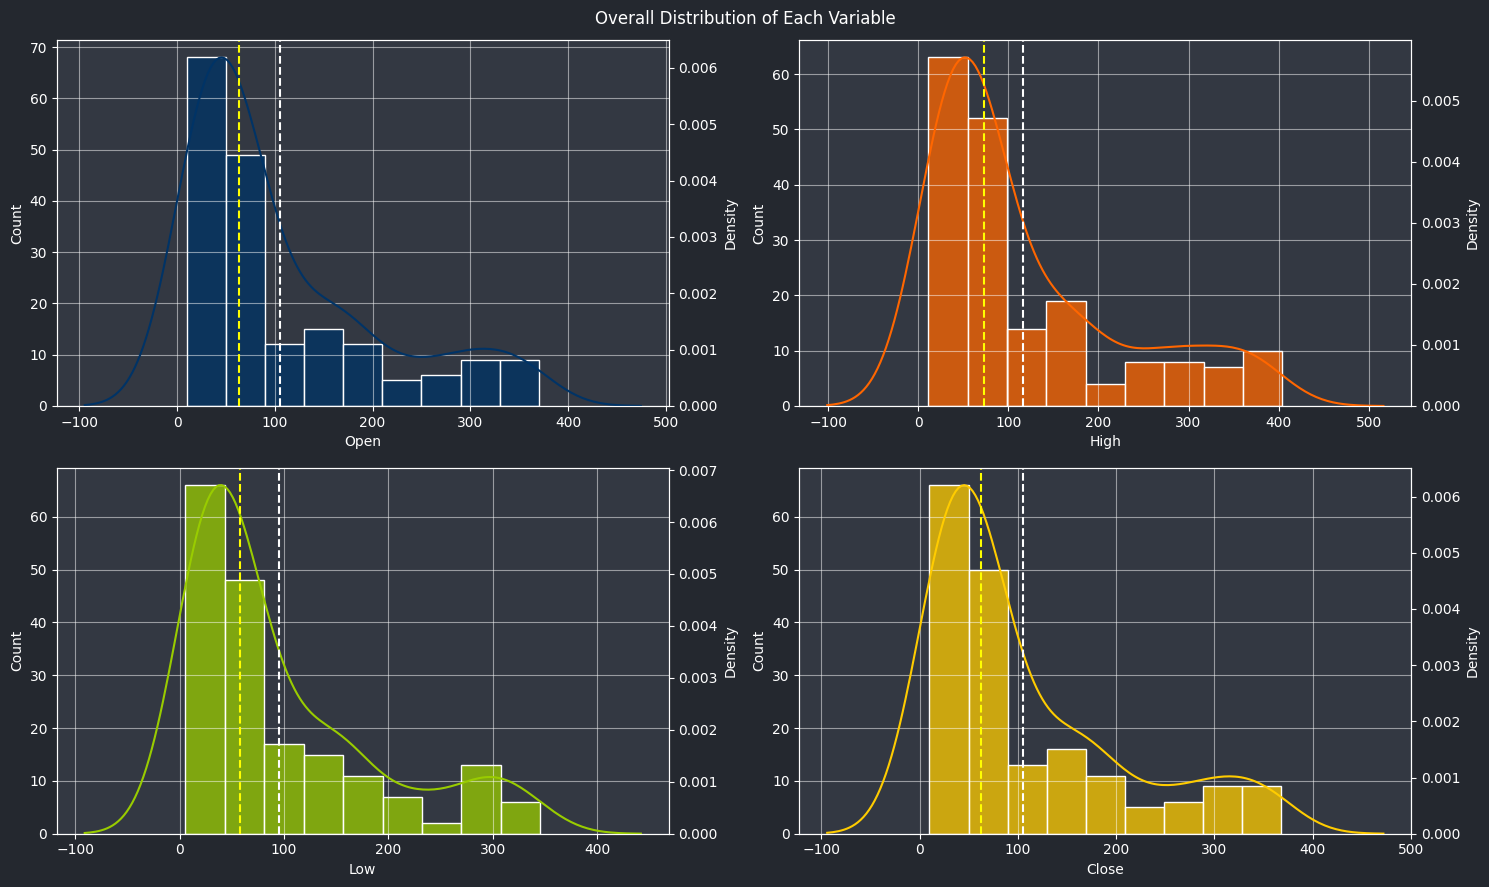

In [24]:
# Set the figure size and title
plt.figure(figsize=(15, 9))
plt.suptitle('Overall Distribution of Each Variable', color='white')

# Define the color list for each variable (using Yes Bank color scheme)
color_list = ['#003366', '#FF6600', '#99CC00', '#FFCC00']

# Set the dark theme background color
plt.style.use('dark_background')

for i, column in enumerate(stock_df.columns):
    # Create subplots
    ax1 = plt.subplot(2, 2, i + 1)
    ax2 = ax1.twinx()

    # Plot histogram
    sns.histplot(stock_df[column], color=color_list[i], ax=ax1)

    # Plot KDE curve
    sns.kdeplot(stock_df[column], color=color_list[i], ax=ax2)

    # Set gridlines
    ax1.grid(which='major', alpha=0.5)
    ax1.grid(which='minor', alpha=0.5)

    # Add vertical lines for mean and median
    plt.axvline(stock_df[column].mean(), color='white', linestyle='dashed', linewidth=1.5)
    plt.axvline(stock_df[column].median(), color='yellow', linestyle='dashed', linewidth=1.5)

# Set the background color of the figure
plot_bgcolor = (36/255, 40/255, 47/255, 1)  # RGB values divided by 255, with alpha=1 for full opacity
plt.gcf().patch.set_facecolor(plot_bgcolor)

# Set the background color of the axes
paper_bgcolor = (51/255, 56/255, 66/255, 1)  # RGB values divided by 255, with alpha=1 for full opacity
for ax in plt.gcf().get_axes():
    ax.set_facecolor(paper_bgcolor)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

#### `1. Why did you pick the specific chart?`

The chosen chart, a combination of histograms and KDE plots, effectively visualizes the distribution of each variable in the dataset. It allows for the examination of central tendency, spread, and shape of the distributions. The subplots enable easy comparison between variables. The color scheme aligns with the Yes Bank branding. The chart aids in data exploration and analysis, providing insights into skewness, multimodality, and outliers. It is a concise and efficient representation of the overall distribution of the variables. The histograms show frequency distribution, while the KDE plots provide a smooth curve. The chart is visually cohesive and facilitates pattern identification. It serves as a valuable tool for understanding the dataset and identifying relationships between variables.

#### `2. What is/are the insight(s) found from the chart?`

The distributions of open, high, low, and close in the chart are positively skewed. This indicates that the majority of data points are concentrated on the left side of the distributions, with a tail extending towards larger values on the right side. The histograms and KDE plots clearly show this skewness. Positive skewness suggests that the variables have a tendency for higher values, but with fewer occurrences. The presence of positive skewness may indicate bounded or restricted variables, resulting in an accumulation of values on the lower end and a tail of relatively larger values. Proper consideration of the positive skewness is important for accurate data analysis and modeling, potentially requiring transformations or alternative techniques to account for the skewness.

#### `3. Will the gained insights help creating a positive business impact?`

The gained insights about the positively skewed distributions of open, high, low, and close prices can have a positive business impact by informing strategic decision-making and identifying potential buying opportunities. However, it is important to note that positive skewness does not directly imply negative growth. Negative growth would require a comprehensive analysis considering various factors beyond skewness, such as trends, market conditions, and external influences. Therefore, it is not justified to conclude specific insights leading to negative growth based solely on the skewness of the distributions. Further analysis is needed to assess any potential negative impacts on business growth.